# Wave Spectral Analysis Assessment
##### Bakel Bakel Begededum
The input data required for this code to run properly an excel data file;
Containing the Significant wave height of the selected area and its frequency 
<br>and the zero crossing periods and its frequency.

This markdown gives the code, process, visualization and report of qualities of the wave spectrum
<br>This assessment:

1. Plots the histogram of significant wave height as well as zero crossing periods for the global wave statictics area in question.
2. Determines the ideal sea spectral for the most probable wave height and zero crossing period and plots it graphically
3. Calculates spectral moments m0, m1 and m2.
4. Determine the 100 years wave height for the GWS area

This particular report uses North Atlantic Ocean Area 3 data

> 1. This is the section of the project that plots the histogram of the significant wave heights.


> 2. This is the section of the project that plots the Hs vs occurances and Zero crossing period

The table below shows the Wave Height(m), Mean Wave Height(m) and Occurances in the selected area.



,Wave Height (m),Mean Wave Height (m),Occurances
0,0-1,0.500000,123
1,1-2,1.500000,300
2,2-3,2.500000,243
3,3-4,3.500000,151
4,4-5,4.500000,85
5,5-6,5.500000,45
6,6-7,6.500000,24
7,7-8,7.500000,13
8,8-9,8.500000,7
9,9-10,9.500000,4




The table below shows the Zero Crossing Period(s), Mean Zero Crossing Period(m) and Occurances in the selected area.



,Zero Crossing Period (s),Mean Zero Crossing Period (m),Occurances
0,< 4,,1
1,4 - 5,4.500000,20
2,5 - 6,5.500000,114
3,6 - 7,6.500000,256
4,7 - 8,7.500000,284
5,8 - 9,8.500000,191
6,9 - 10,9.500000,89
7,10 - 11,10.500000,32
8,11 - 12,11.500000,9
9,12 - 13,12.500000,2


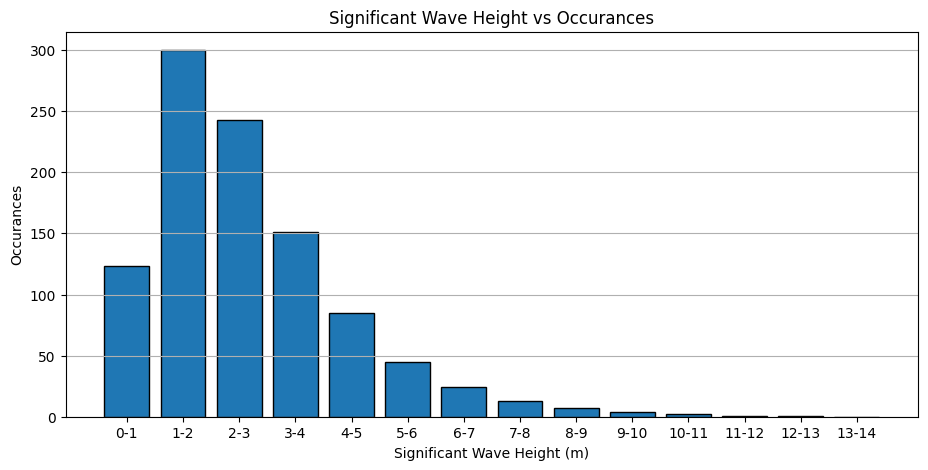

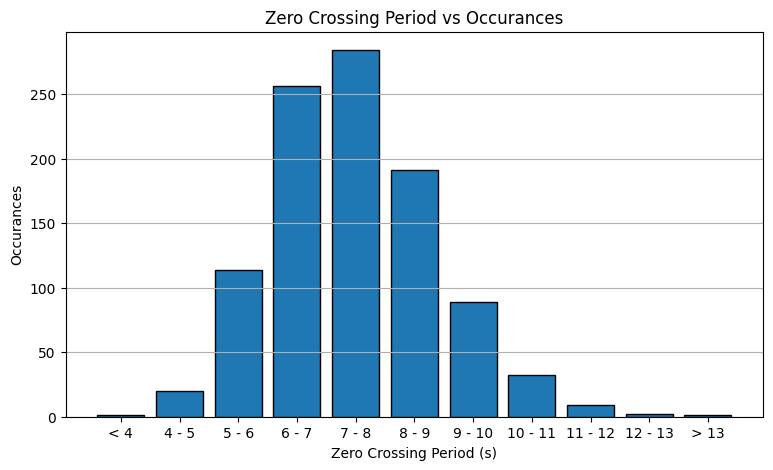

In [395]:
import pandas as pd
import matplotlib.pylab as plot
import numpy as np
from IPython.display import display, Markdown
from scipy.integrate import quad


# Custom styling function
def style_rows(row):
    if row.name == 0:  # First row
        return ['background-color: darkblue; color: white' for _ in row]
    else:  # Following rows
        return ['background-color: lightblue' for _ in row]
    
#Specify the Excel File Path
rawExcelData = 'Area 3.xlsx'
dataExcel = pd.read_excel(rawExcelData, header=None, keep_default_na=False)

#I want to plot for "All directions" of the wind first.
h_Range = [item[0] for item in dataExcel.iloc[1:15,0:1].values.tolist()]
h_Mean = [item[0] for item in dataExcel.iloc[1:15,1:2].values.tolist()]
h_Freq = [item[0] for item in dataExcel.iloc[1:15,2:3].values.tolist()]

t_Range = [item[0] for item in dataExcel.iloc[17:28,0:1].values.tolist()]
t_Mean = [item[0] for item in dataExcel.iloc[17:28,1:2].values.tolist()]
t_Freq = [item[0] for item in dataExcel.iloc[17:28,2:3].values.tolist()]

markdown_text4 = f'''
> 2. This is the section of the project that plots the Hs vs occurances and Zero crossing period
\nThe table below shows the Wave Height(m), Mean Wave Height(m) and Occurances in the selected area.

'''

# Display the markdown
display(Markdown(markdown_text4))

df = pd.DataFrame({
    'Wave Height (m)': h_Range,
    'Mean Wave Height (m)': h_Mean,
    'Occurances': h_Freq
})
df = df.style.set_table_styles([{'selector': 'td, th', 'props': [('border', '2px solid black')]}])
display(df)

figg = plot.figure(figsize=(11, 5))
ay = figg.add_subplot(111)
ay.bar(h_Range,h_Freq, edgecolor='black')
ay.grid(True, axis='y');plot.xlabel("Significant Wave Height (m)");plot.ylabel("Occurances");plot.title("Significant Wave Height vs Occurances");


markdown_text5 = f'''

The table below shows the Zero Crossing Period(s), Mean Zero Crossing Period(m) and Occurances in the selected area.

'''

# Display the markdown
display(Markdown(markdown_text5))

df2 = pd.DataFrame({
    'Zero Crossing Period (s)': t_Range,
    'Mean Zero Crossing Period (m)': t_Mean,
    'Occurances': t_Freq
})

#df2 = df2.style.apply(style_rows, axis=1)
df2 = df2.style.set_table_styles([{'selector': 'td, th', 'props': [('border', '2px solid black')]}])

display(df2)

fig = plot.figure(figsize=(9, 5))
ax = fig.add_subplot(111)
ax.bar(t_Range, t_Freq, edgecolor = 'Black')
ax.grid(True, axis='y');plot.xlabel("Zero Crossing Period (s)");plot.ylabel("Occurances");plot.title("Zero Crossing Period vs Occurances");





> 3. This section plots the Energy Density Spectrum, calculates A, B and Spectral moments



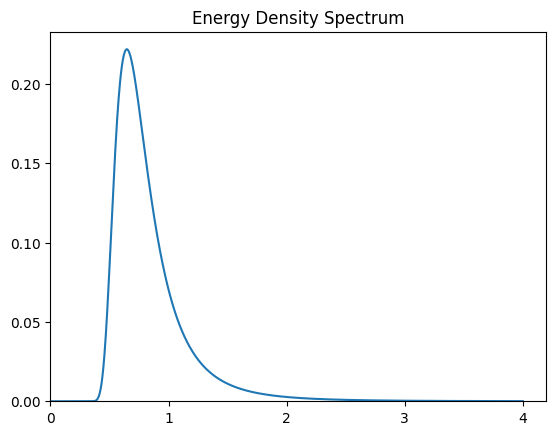



The Maximum Significant Height H_1/3 = 1.5

The Maximum Zero Crossing Period Tz (s) = 7.5

A = 0.0875

B = 0.2184

H1_3 (4sqrt(Mo)) = 1.2651719113677955

Mo = 0.10004124783212757

M1 = 0.08342

M2 = 0.0802

M4 = 0.09411



In [396]:
def S_w(w):
    return (A/w**5)*np.exp(-B/w**4)

def wS_w(w):
    return w*S_w(w)

def w2S_w(w):
    return w*wS_w(w)

def w4S_w(w):
    return w*w2S_w(w)

markdown_text6 = f'''

> 3. This section plots the Energy Density Spectrum, calculates A, B and Spectral moments

'''

# Display the markdown
display(Markdown(markdown_text6))

#Maximum Values
h_max = h_Mean[h_Freq.index(max(h_Freq))]
t_max = t_Mean[t_Freq.index(max(t_Freq))]
A = 123*((h_max**2)/(t_max**4))
B = 691/t_max**4
w = np.linspace(0, 4, 1000).tolist()
Sw = [S_w(item) if item!= 0 else 0 for item in w]
Mo, error = quad(S_w, 0, 4)
M1, error = quad(wS_w, 0, 4)
M2, error = quad(w2S_w, 0, 4)
M4, error = quad(w4S_w, 0, 4)
H1_3 = 4*np.sqrt(Mo)



plot.plot(w,Sw)
plot.ylim(bottom=0)
plot.xlim(left=0)  
plot.xticks([0,1,2,3,4])
plot.title("Energy Density Spectrum")
plot.show()

markdown_text = f"""

The Maximum Significant Height H_1/3 = {str(h_max)}
\nThe Maximum Zero Crossing Period Tz (s) = {str(t_max)}
\nA = {round(123*((h_max**2)/(t_max**4)),4)}
\nB = {round(691/t_max**4, 4)}
\nH1_3 (4sqrt(Mo)) = {H1_3}
\nMo = {Mo}
\nM1 = {round(M1,5)}
\nM2 = {round(M2,5)}
\nM4 = {round(M4,5)}

"""
# Display the markdown
display(Markdown(markdown_text))




> 4. This section calculates and plots the Weibull Distribution, determines Form Factor k, Scale Factor v and Predicted Hs after 100 years.



,H (m),N,N_cum,F(H),z = ln(H),1/1-FH,y = ln(ln(1/1-FH)
0,0.5,123,123,0.1231,-0.6931,1.1404,-2.0297
1,1.5,300,423,0.4234,0.4055,1.7343,-0.5967
2,2.5,243,666,0.6667,0.9163,3.0003,0.0941
3,3.5,151,817,0.8178,1.2528,5.4885,0.5322
4,4.5,85,902,0.9029,1.5041,10.2987,0.8467
5,5.5,45,947,0.9479,1.7047,19.1939,1.0834
6,6.5,24,971,0.9720,1.8718,35.7143,1.2741
7,7.5,13,984,0.9850,2.0149,66.6667,1.4350
8,8.5,7,991,0.9920,2.1401,125.0000,1.5745
9,9.5,4,995,0.9960,2.2513,250.0000,1.7086


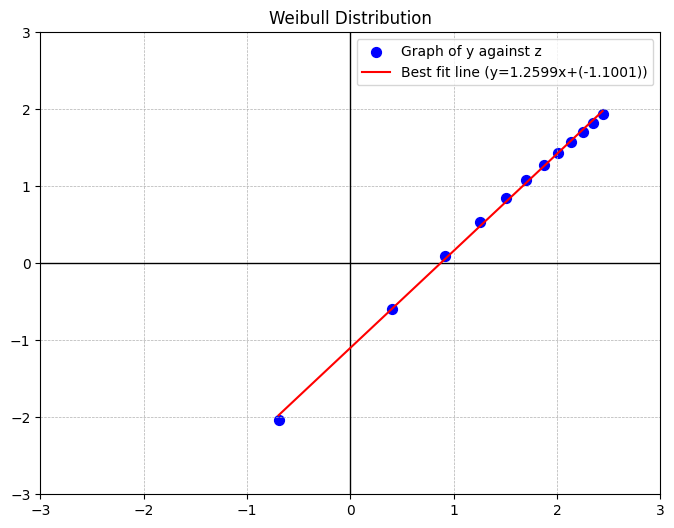


The equation of the Line of Best Fit is y = 1.2599x + [-1.1001]

 R2 Value = 0.9989059001600069

 Form Factor k = 1.2599

 Scale Factor v = 2.3944

 Predicted Hs after 100 years = 17.9m


In [397]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

markdown_text7 = f'''

> 4. This section calculates and plots the Weibull Distribution, determines Form Factor k, Scale Factor v and Predicted Hs after 100 years.

'''

# Display the markdown
display(Markdown(markdown_text7))

# Create a pandas DataFrame
df3 = pd.DataFrame({'H (m)': h_Mean, 'N': h_Freq})

# Filter out rows where frequency is 0
df3 = df3[df3['N'] > 0]

# Calculate cumulative frequency
df3['N_cum'] = df3['N'].cumsum()

N_sum = df3['N'].sum()

df3['F(H)'] = (df3['N_cum']/N_sum).round(4)
df3['z = ln(H) '] = np.log(df3['H (m)']).round(4)
df3['1/1-FH'] = (1/(1-df3['F(H)'])).round(4)
df3['y = ln(ln(1/1-FH)'] = (np.log(np.log(df3['1/1-FH']))).round(4)

display(df3)


df3 = df3[~np.isinf(df3['y = ln(ln(1/1-FH)'])]  # This removes rows where 'z' is infinite
y = df3['y = ln(ln(1/1-FH)'].values.reshape(-1, 1)
z = df3['z = ln(H) '].values.reshape(-1, 1)


model = LinearRegression()
model.fit(z,y)

y_pred = model.predict(z)
r_squared = r2_score(y, y_pred)
slope = model.coef_[0][0]
intercept = model.intercept_[0]


plot.figure(figsize=(8, 6))
plot.scatter(z,y, color='blue', s=50, label = 'Graph of y against z')
plot.axhline(0, color='black', linewidth=1)  # x-axis at y=0
plot.axvline(0, color='black', linewidth=1)  # y-axis at x=0
plot.ylim([-3,3])
plot.xlim([-3,3])
plot.grid(True, which='both', linestyle='--', linewidth=0.5)

plot.plot(z, y_pred, color='red', label=f'Best fit line (y={slope:.4f}x+({intercept:.4f}))')  # Red line
plot.title("Weibull Distribution")
plot.legend(loc='best')
plot.show()

lnv= -(intercept/slope)
Scale_Factor = np.exp(lnv).round(4)
Hs = Scale_Factor*(np.log(100*365*8))**(1/slope)

markdown_text2 = f"""
The equation of the Line of Best Fit is y = {slope.round(4)}x + [{intercept.round(4)}]
\n R2 Value = {r_squared}
\n Form Factor k = {slope.round(4)}
\n Scale Factor v = {Scale_Factor}
\n Predicted Hs after 100 years = {Hs.round(1)}m
"""
# Display the markdown
display(Markdown(markdown_text2))





## SPECTRAL PARAMETERS

In [398]:
markdown_text8 = f'''

> 4. This section calculates other spectral parameters
'''

# Display the markdown
display(Markdown(markdown_text8))

w01 = M1/Mo
MeanPeriod_T1 = 2*np.pi*w01
T2 = 2*np.pi*np.sqrt(Mo/M2)
T4 = 2*np.pi*np.sqrt(M2/M4)
E = np.sqrt(1-((M2**2)/(Mo*M4)))

markdown_text3 = f"""

\n W_01 = {round(w01,4)}
\n Mean Period of the Zero Upcrossings T2 = {T2.round(4)}s
\n Peaks Mean Period T4 = {T4.round(4)}s
\n Band Width = {E.round(4)}m
"""
# Display the markdown
display(Markdown(markdown_text3))






> 4. This section calculates other spectral parameters





 W_01 = 0.8339

 Mean Period of the Zero Upcrossings T2 = 7.0174s

 Peaks Mean Period T4 = 5.8004s

 Band Width = 0.5628m
